In [1]:
'''Import Libraries'''
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf

In [2]:
'''Read Data'''
data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [3]:
'''Prep Data'''

# Generate dependent variable
y = data.iloc[:,0]
# Generate matrix of features
X = data.iloc[:,1:-1]

print(X.shape, y.shape)

'''Splitting dataset into training and testing dataset''' 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)


(253680, 20) (253680,)


In [4]:
'''Performing Feature Scaling'''
# Normalization is used only when our dataset follows a normal distribution (-1 to +1)
# while standardization is a universal technique that can be used for any dataset irrespective of the distribution (-3 to +3)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [7]:
'''Training Artificial Neural Network'''
# !! experiment with the value
number_of_nodes = 6

def keras_model(number_of_nodes):
    #initialize ANN
    ann = tf.keras.models.Sequential()

    # architecture: 2 hidden layers, 1 input layer, and 1 output layer

    # first hidden layer
    ann.add(tf.keras.layers.Dense(units=number_of_nodes,activation="relu"))

    # second hidden layer
    ann.add(tf.keras.layers.Dense(units=number_of_nodes,activation="relu"))

    # output layer
    # two classes as output (0 or 1) => one node
    # binary classification => sigmoid activation function
    ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
    
    return ann


In [9]:
'''Compiling ANN'''
ann = keras_model(8)

ann.compile(optimizer="Adam",
            loss="binary_crossentropy",
            metrics=['accuracy'])

'''Fitting ANN'''
history = ann.fit(X_train, y_train, validation_split=0.33, batch_size=32,epochs = 100)



2022-04-27 12:21:16.019506: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
4250/4250 [==============================] - 18s 4ms/step - loss: 0.3324 - accuracy: 0.8604 - val_loss: 0.3138 - val_accuracy: 0.8662
Epoch 2/100
4250/4250 [==============================] - 17s 4ms/step - loss: 0.3203 - accuracy: 0.8635 - val_loss: 0.3116 - val_accuracy: 0.8665
Epoch 3/100
4250/4250 [==============================] - 11s 3ms/step - loss: 0.3185 - accuracy: 0.8638 - val_loss: 0.3113 - val_accuracy: 0.8688
Epoch 4/100
4250/4250 [==============================] - 12s 3ms/step - loss: 0.3176 - accuracy: 0.8647 - val_loss: 0.3095 - val_accuracy: 0.8684
Epoch 5/100
4250/4250 [==============================] - 19s 4ms/step - loss: 0.3173 - accuracy: 0.8649 - val_loss: 0.3092 - val_accuracy: 0.8684
Epoch 6/100
4250/4250 [==============================] - 14s 3ms/step - loss: 0.3170 - accuracy: 0.8650 - val_loss: 0.3092 - val_accuracy: 0.8690
Epoch 7/100
4250/4250 [==============================] - 20s 5ms/step - loss: 0.3169 - accuracy: 0.8650 - val_loss: 0.3093 -

In [10]:
'''Predicting and Evaluating Model'''
from sklearn.metrics import accuracy_score
y_pred = ann.predict(X_test)
y_pred[y_pred <= 0.5] = 0.
y_pred[y_pred > 0.5] = 1.

accuracy_score(y_test, y_pred)

0.8653421633554084

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


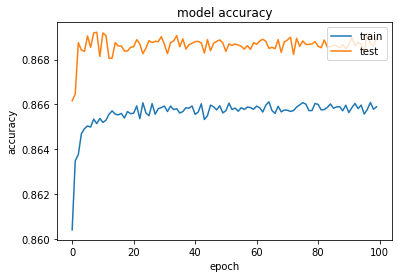

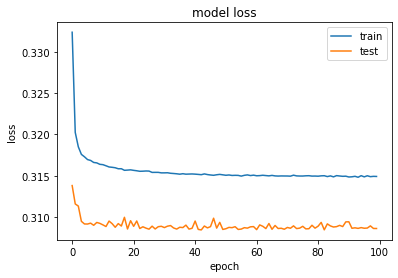

In [11]:
'''Visualizing Accuracy and Loss'''

import matplotlib.pyplot as plt

print(history.history.keys())

'''summarize history for accuracy'''
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


'''summarize history for loss'''
# loss - elbow shaped means model have achieved maximum accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()



In [19]:
'''Optimizing using Grid Search'''
# will take hours to run 

results = []

Optimizer = ['SGD','Adam']
Loss_Function = ['binary_crossentropy','mean_squared_error']
Learning_Rate = [.01,.001,.0001]
Batch_Size = [32,64,128]
Nodes = [6,8,10]
Epochs = [50]

for optimizer in Optimizer:
    for loss in Loss_Function:
        for lr in Learning_Rate:
            for bs in Batch_Size:
                for epoch in Epochs:
                    
                    print(optimizer, loss, lr, bs, epoch)

                    '''Compiling ANN'''
                    ann = keras_model()

                    if optimizer == 'Adam':
                        opt = tf.keras.optimizers.Adam(learning_rate=lr)
                    else:
                        opt = tf.keras.optimizers.SGD(learning_rate=lr)
                    
                    ann.compile(optimizer=opt,
                                loss=loss,
                                metrics=['accuracy'])

                    '''Fitting ANN'''
                    history = ann.fit(X_train, y_train, validation_split=0.33, batch_size=bs,epochs = epoch)

                    '''Predicting'''
                    y_pred = ann.predict(X_test)
                    y_pred[y_pred <= 0.5] = 0.
                    y_pred[y_pred > 0.5] = 1.
                    acc = accuracy_score(y_test, y_pred)
                    
                    print('ACCURACY:', acc)
                    results.append([(optimizer, loss, lr, bs, epoch, acc)])

                    


                    
                    

SGD binary_crossentropy 0.01 32 50
Epoch 1/50
4250/4250 [==============================] - 13s 3ms/step - loss: 0.3714 - accuracy: 0.8575 - val_loss: 0.3279 - val_accuracy: 0.8632
Epoch 2/50
4250/4250 [==============================] - 11s 3ms/step - loss: 0.3313 - accuracy: 0.8595 - val_loss: 0.3197 - val_accuracy: 0.8632
Epoch 3/50
4250/4250 [==============================] - 11s 3ms/step - loss: 0.3260 - accuracy: 0.8599 - val_loss: 0.3162 - val_accuracy: 0.8649
Epoch 4/50
4250/4250 [==============================] - 11s 3ms/step - loss: 0.3235 - accuracy: 0.8618 - val_loss: 0.3146 - val_accuracy: 0.8657
Epoch 5/50
4250/4250 [==============================] - 11s 3ms/step - loss: 0.3219 - accuracy: 0.8629 - val_loss: 0.3135 - val_accuracy: 0.8667
Epoch 6/50
4250/4250 [==============================] - 11s 3ms/step - loss: 0.3209 - accuracy: 0.8632 - val_loss: 0.3127 - val_accuracy: 0.8667
Epoch 7/50
4250/4250 [==============================] - 11s 3ms/step - loss: 0.3201 - accuracy:

KeyboardInterrupt: 

In [20]:
print(results)


[[('SGD', 'binary_crossentropy', 0.01, 32, 50, 0.8656575212866604)], [('SGD', 'binary_crossentropy', 0.01, 64, 50, 0.8653224534847052)], [('SGD', 'binary_crossentropy', 0.01, 128, 50, 0.8652041942604857)], [('SGD', 'binary_crossentropy', 0.001, 32, 50, 0.8646523178807947)], [('SGD', 'binary_crossentropy', 0.001, 64, 50, 0.8618338063702302)], [('SGD', 'binary_crossentropy', 0.001, 128, 50, 0.8610059918006938)], [('SGD', 'binary_crossentropy', 0.0001, 32, 50, 0.8599416587827183)], [('SGD', 'binary_crossentropy', 0.0001, 64, 50, 0.8609665720592873)], [('SGD', 'binary_crossentropy', 0.0001, 128, 50, 0.8609862819299905)]]
